In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [2]:
this_dir = Path.cwd()
dataset_file = this_dir / "data/pd_speech_features.ods" 

In [3]:
df = pd.read_excel(dataset_file, header=[0, 1], engine="odf")
df.head()

Basic Info        Baseline Features                              \
          id gender               PPE      DFA     RPDE numPulses   
0          0      1           0.85247  0.71826  0.57227       240   
1          0      1           0.76686  0.69481  0.53966       234   
2          0      1           0.85083  0.67604  0.58982       232   
3          1      0           0.41121  0.79672  0.59257       178   
4          1      0           0.32790  0.79782  0.53028       236   

                                                                     ...  \
  numPeriodsPulses meanPeriodPulses stdDevPeriodPulses locPctJitter  ...   
0              239         0.008064           0.000087      0.00218  ...   
1              233         0.008258           0.000073      0.00195  ...   
2              231         0.008340           0.000060      0.00176  ...   
3              177         0.010858           0.000183      0.00419  ...   
4              235         0.008162           0.002669      0.00535  ...   

              TQWT Features                            \
  tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0                    1.5620                    2.6445   
1                    1.5589                    3.6107   
2                    1.5643                    2.3308   
3                    3.7805                    3.5664   
4                    6.1727                    5.8416   

                                                       \
  tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                    3.8686                    4.2105   
1                   23.5155                   14.1962   
2                    9.4959                   10.7458   
3                    5.2558                   14.0403   
4                    6.0805                    5.7621   

                                                       \
  tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                    5.1221                    4.4625   
1                   11.0261                    9.5082   
2                   11.0177                    4.8066   
3                    4.2235                    4.6857   
4                    7.7817                   11.6891   

                                                       \
  tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35   
0                    2.6202                    3.0004   
1                    6.5245                    6.3431   
2                    2.9199                    3.1495   
3                    4.8460                    6.2650   
4                    8.2103                    5.0559   

                            Class  
  tqwt_kurtosisValue_dec_36 class  
0                   18.9405     1  
1                   45.1780     1  
2                    4.7666     1  
3                    4.0603     1  
4                    6.1164     1  

[5 rows x 755 columns]

## Participants profile

In [4]:
par_df = pd.concat([df['Basic Info'], df['Class']], axis=1)
par_df.head()

,id,gender,class
0,0,1,1
1,0,1,1
2,0,1,1
3,1,0,1
4,1,0,1


In [5]:
grouped_by_parti = par_df.groupby("id")
participants_count = len(grouped_by_parti)
print("Total No of participants : ", participants_count)

Total No of participants :  252


In [6]:
participants_profile = []
for ind , grp in grouped_by_parti:
    ag = grp['gender'].to_numpy()
    assert (ag[0] == ag).all()
    ac = grp['class'].to_numpy()
    assert (ac[0] == ac).all()
    participants_profile.append((ind, len(grp), ag[0], ac[0]))

participants_profile = pd.DataFrame(participants_profile, columns=['Participant ID', 'Instance Count', 'Gender', 'Parkinson-s disease'])
participants_profile.head()

,Participant ID,Instance Count,Gender,Parkinson-s disease
0,0,3,1,1
1,1,3,0,1
2,2,3,1,1
3,3,3,0,1
4,4,3,0,1


In [7]:
participants_profile['Instance Count'].describe()

count    252.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: Instance Count, dtype: float64

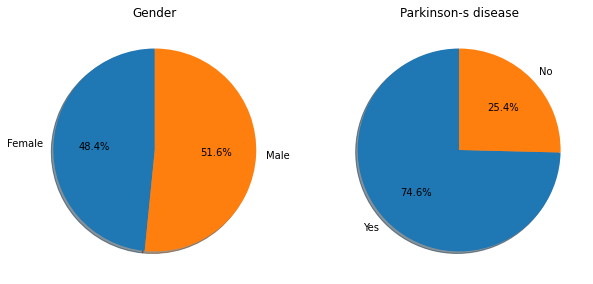

In [8]:
plt.figure(figsize=(10,10))

gender_count = participants_profile['Gender'].value_counts()
labels = ['Female', 'Male']
sizes = (gender_count[0], gender_count[1])
ax1 = plt.subplot(121)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Gender')

pk_count = participants_profile['Parkinson-s disease'].value_counts()
labels = ['Yes', 'No']
sizes = (pk_count[1], pk_count[0])
ax2 = plt.subplot(122)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('Parkinson-s disease')
plt.show()

## Feature profile

In [9]:
feature_df = pd.DataFrame(list(df.columns.values), columns=['Feature Type', 'Features'])
feature_df.head()

,Feature Type,Features
0,Basic Info,id
1,Basic Info,gender
2,Baseline Features,PPE
3,Baseline Features,DFA
4,Baseline Features,RPDE


In [10]:
grouped = feature_df.groupby('Feature Type')
feature_count = {grp_name: len(ids) for grp_name, ids in grouped.groups.items()}
del feature_count['Basic Info'], feature_count['Class']
feature_count

{'Bandwidth Parameters': 4,
 'Baseline Features': 21,
 'Formant Frequencies': 4,
 'Intensity Parameters': 3,
 'MFCC': 84,
 'TQWT Features': 432,
 'Vocal Fold': 22,
 'Wavelet Features': 182}

<BarContainer object of 8 artists>

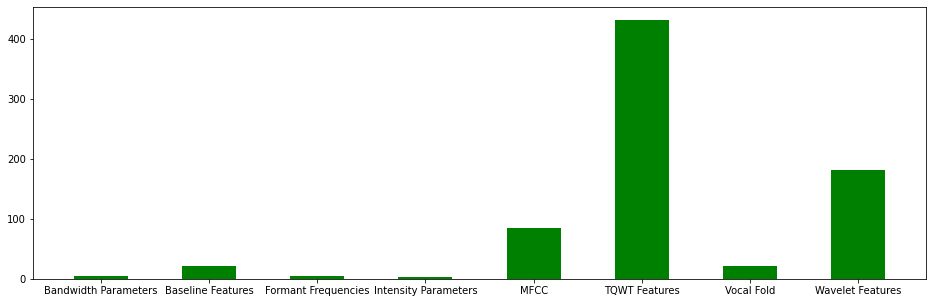

In [11]:
f, ax = plt.subplots(figsize=(16,5))
ax.bar(feature_count.keys(), feature_count.values(), width=.5, color='g')

### Baseline Features

**PPE** - Pitch Period Entropy


In [12]:
baseline_features = df['Baseline Features']
baseline_features.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,0.00499,0.05610,0.497,0.02909,0.03327,0.05278,0.08728,0.975754,0.027139,19.557


In [13]:
baseline_features.describe()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,...,756.000000,756.000000,756.00000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,0.000605,...,0.001815,0.067473,0.60642,0.034375,0.041175,0.055366,0.103125,0.961508,0.051131,18.859632
std,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,0.000981,...,0.002942,0.042969,0.38257,0.022366,0.027165,0.033939,0.067097,0.064095,0.104579,5.576473
min,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,0.000020,...,0.000050,0.006560,0.05700,0.003350,0.004150,0.000370,0.010040,0.589609,0.000618,1.655000
25%,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,0.000150,...,0.000450,0.036098,0.31875,0.017843,0.021935,0.030963,0.053538,0.963341,0.007168,15.713250
50%,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,0.000280,...,0.000840,0.055730,0.50250,0.027980,0.033705,0.047545,0.083945,0.984339,0.016273,19.309500
75%,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,0.000650,...,0.001952,0.085547,0.79650,0.044665,0.053022,0.071385,0.134000,0.992916,0.040061,22.877750
max,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,0.011050,...,0.033150,0.251010,2.11400,0.130510,0.199510,0.277500,0.391540,0.999382,0.761696,33.197000


<AxesSubplot:>

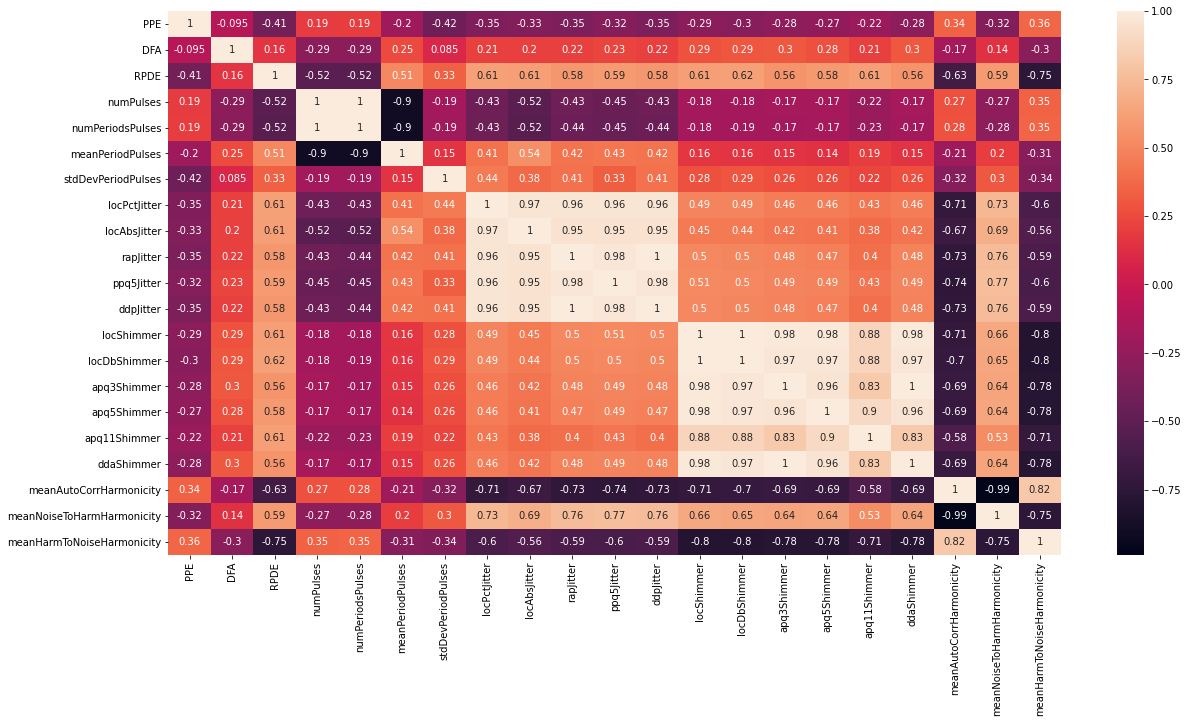

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(baseline_features.corr(), annot=True)